In [257]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from datetime import timedelta

from sklearn.metrics import mean_squared_error
from mpl_toolkits.mplot3d import Axes3D

from lifetimes.utils import summary_data_from_transaction_data,calibration_and_holdout_data
from lifetimes import BetaGeoFitter, GammaGammaFitter, ModifiedBetaGeoFitter, ParetoNBDFitter, BetaGeoBetaBinomFitter

In [258]:
df = pd.read_csv(r'F:\01_Dataset\04 Tabular\09 Online Retail\data.csv',encoding='unicode_escape')

In [259]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [260]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


## PART I. EXPLORATORY DATA ANALYSIS

In [261]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [262]:
df = df.dropna()

In [263]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [264]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Revenue'] = df['UnitPrice'] * df['Quantity']
df = df[df['Quantity'] > 0]

In [265]:
df['Date'] = df['InvoiceDate'].dt.date
df['Time'] = df['InvoiceDate'].dt.time
df['Day_of_week'] = df['InvoiceDate'].dt.day_name()
df['Day_of_week'].unique()

array(['Wednesday', 'Thursday', 'Friday', 'Sunday', 'Monday', 'Tuesday'],
      dtype=object)

In [266]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397924 entries, 0 to 541908
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397924 non-null  object        
 1   StockCode    397924 non-null  object        
 2   Description  397924 non-null  object        
 3   Quantity     397924 non-null  int64         
 4   InvoiceDate  397924 non-null  datetime64[ns]
 5   UnitPrice    397924 non-null  float64       
 6   CustomerID   397924 non-null  float64       
 7   Country      397924 non-null  object        
 8   Revenue      397924 non-null  float64       
 9   Date         397924 non-null  object        
 10  Time         397924 non-null  object        
 11  Day_of_week  397924 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(7)
memory usage: 39.5+ MB


Text(0.5, 1.0, 'Number of transaction by Country')

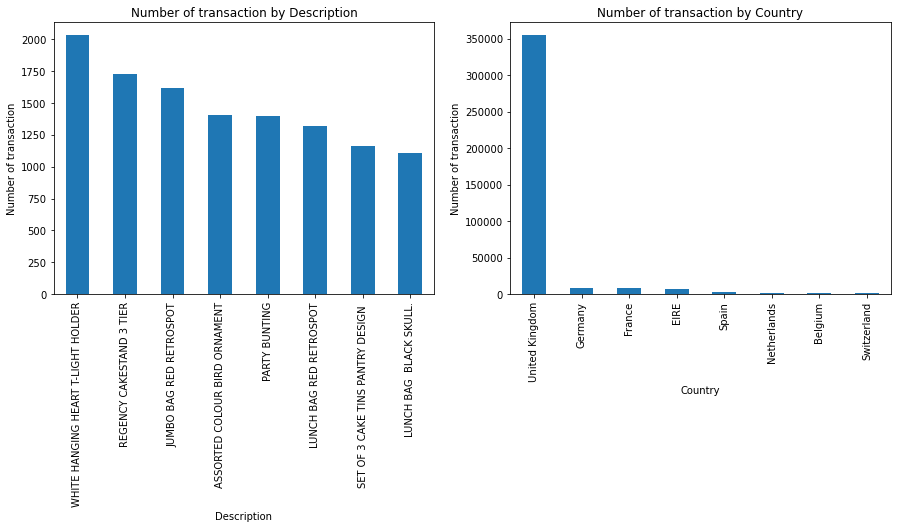

In [267]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,5))
df['Description'].value_counts()[:8].plot(kind='bar',ax=ax1)
df['Country'].value_counts()[:8].plot(kind='bar',ax=ax2)
ax1.set_xlabel('Description')
ax1.set_ylabel('Number of transaction')
ax1.set_title('Number of transaction by Description')
ax2.set_xlabel('Country')
ax2.set_ylabel('Number of transaction')
ax2.set_title('Number of transaction by Country')

Text(0.5, 1.0, 'Number of transaction by Day of Week')

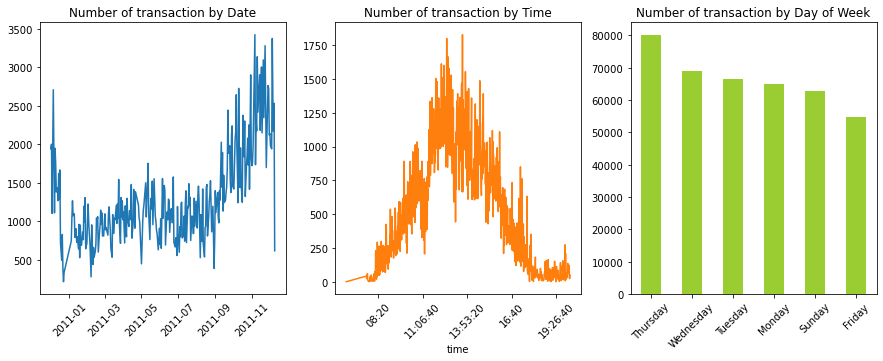

In [268]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,5))
df['Date'].value_counts()[:1000].plot(ax=ax1)
df['Time'].value_counts()[:1000].plot(ax=ax2,color='tab:orange')
df['Day_of_week'].value_counts()[:1000].plot(kind='bar',ax=ax3,color='yellowgreen')
ax1.xaxis.set_tick_params(rotation=45)
ax2.xaxis.set_tick_params(rotation=45)
ax3.xaxis.set_tick_params(rotation=45)
ax1.set_title('Number of transaction by Date')
ax2.set_title('Number of transaction by Time')
ax3.set_title('Number of transaction by Day of Week')

Text(0.5, 1.0, 'Total revenue by Day of Week')

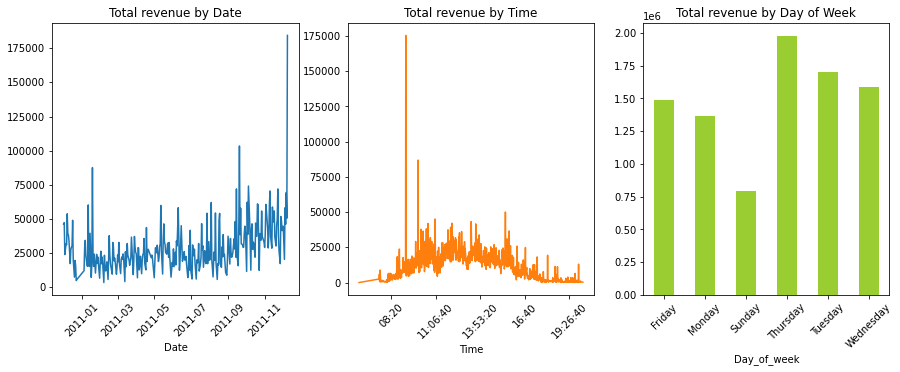

In [269]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,5))
df.groupby('Date')['Revenue'].sum()[:1000].plot(ax=ax1)
df.groupby('Time')['Revenue'].sum()[:1000].plot(ax=ax2,color='tab:orange')
df.groupby('Day_of_week')['Revenue'].sum()[:1000].plot(kind='bar',ax=ax3,color='yellowgreen')
ax1.xaxis.set_tick_params(rotation=45)
ax2.xaxis.set_tick_params(rotation=45)
ax3.xaxis.set_tick_params(rotation=45)
ax1.set_title('Total revenue by Date')
ax2.set_title('Total revenue by Time')
ax3.set_title('Total revenue by Day of Week')

## PART II. DATA PROCESSING
### # RFM ANALYSIS

In [270]:
current_date = dt.datetime(2011,12,11)
df = df[df['Quantity'] > 0]
df[df['CustomerID'] == 12346]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,Date,Time,Day_of_week
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,77183.6,2011-01-18,10:01:00,Tuesday


In [271]:
rfm = df.groupby('CustomerID').agg({'InvoiceDate': lambda invoice_date : (current_date - invoice_date.max()).days,
                                    'InvoiceNo': lambda invoice: invoice.nunique(),
                                   'Revenue': lambda total_price: total_price.sum()})
rfm.columns = ['recency','frequency','monetary']
rfm =  rfm[rfm['monetary'] > 0]
rfm = rfm.reset_index()

In [272]:
rfm['recency_score'] = pd.qcut(rfm['recency'],5,labels=[1,2,3,4,5])
rfm['frequency_score'] = pd.qcut(rfm['frequency'].rank(method='first'),5,labels=[1,2,3,4,5])
rfm['monetary_score'] = pd.qcut(rfm['monetary'],5,labels=[1,2,3,4,5])
rfm['FM'] = rfm['frequency_score'].astype('int') * rfm['monetary_score'].astype('int')
rfm['F&M_score'] = pd.qcut(rfm['FM'],5,labels=[1,2,3,4,5])
rfm['RFM_score'] = rfm['recency_score'].astype('str') + rfm['F&M_score'].astype('str')

In [273]:
seg_map = {r'[1-2][1-2]': 'Hibernating',
           r'[1-2][3-4]': 'At_Risk',
           r'[1-2]5': 'Cant_loose',
           r'3[1-2]': 'About_to_sleep',
           r'33': 'Need_attention',
           r'[3-4][4-5]': 'Loyal_customers',
           r'41': 'Promising',
           r'51': 'New_customers',
           r'[4-5][2-3]': 'Potential_loyalists',
           r'5[4-5]': 'Champions'}

seg_map2 = {'Hibernating':0,
           'At_Risk':1,
           'Cant_loose':2,
           'About_to_sleep':3,
           'Need_attention':4,
           'Loyal_customers':5,
           'Promising':6,
           'New_customers':7,
           'Potential_loyalists':8,
           'Champions':9}


rfm['segment'] = rfm['RFM_score'].replace(seg_map, regex=True)
rfm['segment_code'] = rfm['segment'].replace(seg_map2)
rfm.head()

,CustomerID,recency,frequency,monetary,recency_score,frequency_score,monetary_score,FM,F&M_score,RFM_score,segment,segment_code
0,12346.0,326,1,77183.60,5,1,5,5,2,52,Potential_loyalists,8
1,12347.0,3,7,4310.00,1,5,5,25,5,15,Cant_loose,2
2,12348.0,76,4,1797.24,4,4,4,16,4,44,Loyal_customers,5
3,12349.0,19,1,1757.55,2,1,4,4,2,22,Hibernating,0
4,12350.0,311,1,334.40,5,1,2,2,1,51,New_customers,7


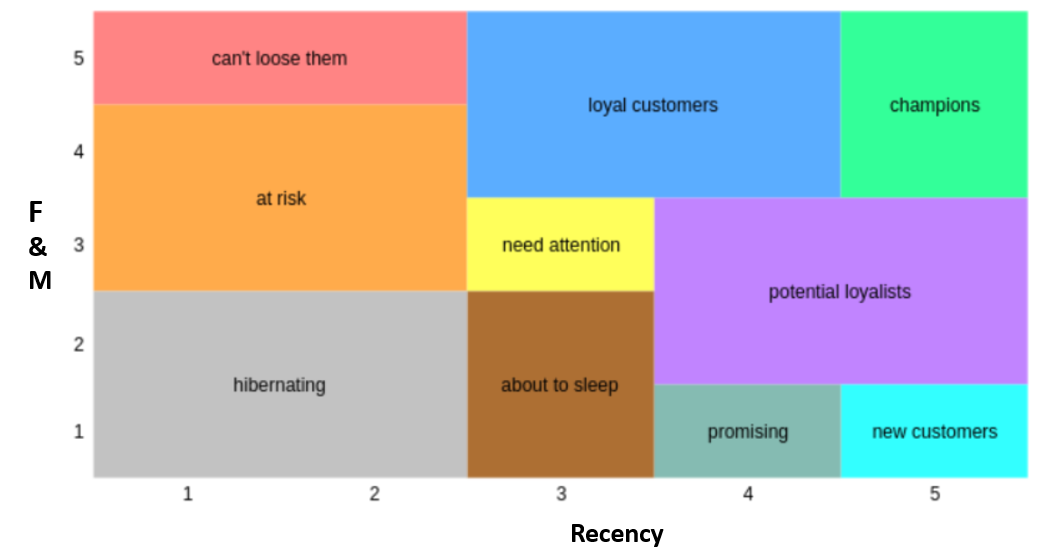

In [274]:
rfm['F&M_score'] = rfm['F&M_score'].astype('int')
rfm_all = df.copy()

In [275]:
cus_type = rfm[['CustomerID','segment']]
cus_type = cus_type.set_index('CustomerID')
cus_type.head()

,segment
CustomerID,
12346.0,Potential_loyalists
12347.0,Cant_loose
12348.0,Loyal_customers
12349.0,Hibernating
12350.0,New_customers


Text(0, 0.5, 'Days')

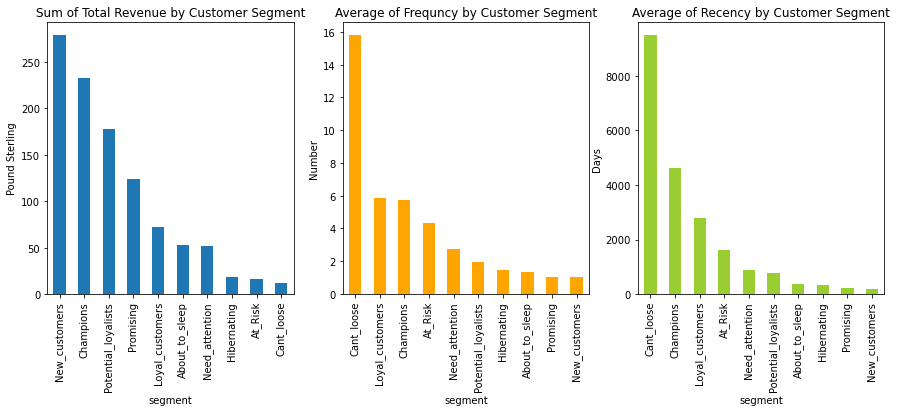

In [276]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,5))
rfm.groupby('segment')['recency'].mean().sort_values(ascending=False).plot(kind='bar',ax=ax1)
rfm.groupby('segment')['frequency'].mean().sort_values(ascending=False).plot(kind='bar',ax=ax2,color='orange')
rfm.groupby('segment')['monetary'].mean().sort_values(ascending=False).plot(kind='bar',ax=ax3,color='yellowgreen')
ax1.set_title('Sum of Total Revenue by Customer Segment')
ax2.set_title('Average of Frequncy by Customer Segment')
ax3.set_title('Average of Recency by Customer Segment')
ax1.set_ylabel('Pound Sterling')
ax2.set_ylabel('Number')
ax3.set_ylabel('Days')

#### Holdout Validation set splitting

In [277]:
t_holdout = 30                                        
max_date = df["InvoiceDate"].max()                    
max_cal_date = max_date - timedelta(days=t_holdout)     
train = calibration_and_holdout_data(
        transactions = df, 
        customer_id_col = "CustomerID", 
        datetime_col = "InvoiceDate",
        monetary_value_col = "Revenue", 
        calibration_period_end = max_cal_date, 
        observation_period_end = max_date, 
        freq = "D")  

In [278]:
train.head()

,frequency_cal,recency_cal,T_cal,monetary_value_cal,frequency_holdout,monetary_value_holdout,duration_holdout
CustomerID,,,,,,,
12346.0,0.0,0.0,295.0,0.000000,0.0,0.000000,30.0
12347.0,5.0,328.0,337.0,674.678000,1.0,20.438182,30.0
12348.0,3.0,283.0,328.0,301.480000,0.0,0.000000,30.0
12350.0,0.0,0.0,280.0,0.000000,0.0,0.000000,30.0
12352.0,6.0,260.0,266.0,368.256667,0.0,0.000000,30.0


<AxesSubplot:>

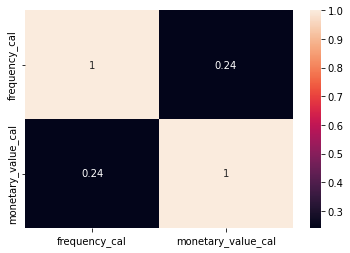

In [279]:
sns.heatmap(train[["frequency_cal", "monetary_value_cal"]].corr(),annot=True)

## PART II.Buy-till-you-die (BTYD) Analysis 
### I. BD/NBD + GammaGamma

In [280]:
summary_bdnbd = train.copy()
bgf = BetaGeoFitter(penalizer_coef=1e-06)
bgf.fit(summary_bdnbd["frequency_cal"], summary_bdnbd["recency_cal"], summary_bdnbd["T_cal"])

<lifetimes.BetaGeoFitter: fitted with 4070 subjects, a: 0.00, alpha: 72.13, b: 0.00, r: 0.81>

In [281]:
summary_bdnbd["predicted_purchases"] = bgf.conditional_expected_number_of_purchases_up_to_time(30,
                                                                                             summary_bdnbd["frequency_cal"],
                                                                                             summary_bdnbd["recency_cal"],
                                                                                             summary_bdnbd["T_cal"])
summary_bdnbd["actual_30"] = summary_bdnbd["frequency_holdout"]/summary_bdnbd["duration_holdout"]*30
summary_bdnbd = summary_bdnbd.fillna(value = 0)
summary_bdnbd["Error"] = summary_bdnbd["actual_30"] - summary_bdnbd["predicted_purchases"]

In [282]:
summary_bdnbd.head()

,frequency_cal,recency_cal,T_cal,monetary_value_cal,frequency_holdout,monetary_value_holdout,duration_holdout,predicted_purchases,actual_30,Error
CustomerID,,,,,,,,,,
12346.0,0.0,0.0,295.0,0.000000,0.0,0.000000,30.0,0.065926,0.0,-0.065926
12347.0,5.0,328.0,337.0,674.678000,1.0,20.438182,30.0,0.425786,1.0,0.574214
12348.0,3.0,283.0,328.0,301.480000,0.0,0.000000,30.0,0.285413,0.0,-0.285413
12350.0,0.0,0.0,280.0,0.000000,0.0,0.000000,30.0,0.068734,0.0,-0.068734
12352.0,6.0,260.0,266.0,368.256667,0.0,0.000000,30.0,0.603912,0.0,-0.603912


#### Error

In [283]:
bdnbd_mse = mean_squared_error(summary_bdnbd["actual_30"],summary_bdnbd["predicted_purchases"])
bdnbd_rmse = np.sqrt(bdnbd_mse)
bdnbd_avg_error = summary_bdnbd["Error"].mean()

#### GammaGamma

In [284]:
filtered_summary = summary_bdnbd[(summary_bdnbd['frequency_cal'] > 0) & (summary_bdnbd['monetary_value_cal'] > 0)]
bdnbd_gg = GammaGammaFitter(penalizer_coef = 0.0)
bdnbd_gg.fit(filtered_summary['frequency_cal'],filtered_summary['monetary_value_cal'])

<lifetimes.GammaGammaFitter: fitted with 2462 subjects, p: 2.13, q: 3.42, v: 483.87>

In [285]:
filtered_summary["predicted_clv"] = bdnbd_gg.customer_lifetime_value(bgf,
                                                       filtered_summary["frequency_cal"],
                                                       filtered_summary["recency_cal"],
                                                       filtered_summary["T_cal"],
                                                       filtered_summary["monetary_value_cal"],
                                                       time = 30,
                                                       freq = 'D',
                                                       discount_rate = 0.01)

In [286]:
filtered_summary.head()

,frequency_cal,recency_cal,T_cal,monetary_value_cal,frequency_holdout,monetary_value_holdout,duration_holdout,predicted_purchases,actual_30,Error,predicted_clv
CustomerID,,,,,,,,,,,
12347.0,5.0,328.0,337.0,674.678000,1.0,20.438182,30.0,0.425786,1.0,0.574214,6907.910795
12348.0,3.0,283.0,328.0,301.480000,0.0,0.000000,30.0,0.285413,0.0,-0.285413,2472.569713
12352.0,6.0,260.0,266.0,368.256667,0.0,0.000000,30.0,0.603912,0.0,-0.603912,5882.772936
12356.0,1.0,80.0,295.0,481.460000,1.0,29.175000,30.0,0.147640,1.0,0.852360,1722.122488
12359.0,3.0,274.0,301.0,1941.693333,0.0,0.000000,30.0,0.306066,0.0,-0.306066,12049.219477


In [287]:
df_bdnbd = filtered_summary.merge(cus_type,on='CustomerID')

### II. MBG/NBD + GammaGamma

In [288]:
summary_mbgnbd = train.copy()
mbgf = ModifiedBetaGeoFitter(penalizer_coef=1e-06)
mbgf.fit(summary_mbgnbd["frequency_cal"], summary_mbgnbd["recency_cal"], summary_mbgnbd["T_cal"])

<lifetimes.ModifiedBetaGeoFitter: fitted with 4070 subjects, a: 0.00, alpha: 72.13, b: 0.00, r: 0.81>

In [289]:
summary_mbgnbd["predicted_purchases"] = mbgf.conditional_expected_number_of_purchases_up_to_time(30,
                                                                                             summary_mbgnbd["frequency_cal"],
                                                                                             summary_mbgnbd["recency_cal"],
                                                                                             summary_mbgnbd["T_cal"])
summary_mbgnbd["actual_30"] = summary_mbgnbd["frequency_holdout"]/summary_mbgnbd["duration_holdout"]*30
summary_mbgnbd = summary_mbgnbd.fillna(value = 0)
summary_mbgnbd["Error"] = summary_mbgnbd["actual_30"] - summary_mbgnbd["predicted_purchases"]

In [290]:
summary_mbgnbd.head()

,frequency_cal,recency_cal,T_cal,monetary_value_cal,frequency_holdout,monetary_value_holdout,duration_holdout,predicted_purchases,actual_30,Error
CustomerID,,,,,,,,,,
12346.0,0.0,0.0,295.0,0.000000,0.0,0.000000,30.0,0.065926,0.0,-0.065926
12347.0,5.0,328.0,337.0,674.678000,1.0,20.438182,30.0,0.425786,1.0,0.574214
12348.0,3.0,283.0,328.0,301.480000,0.0,0.000000,30.0,0.285413,0.0,-0.285413
12350.0,0.0,0.0,280.0,0.000000,0.0,0.000000,30.0,0.068734,0.0,-0.068734
12352.0,6.0,260.0,266.0,368.256667,0.0,0.000000,30.0,0.603912,0.0,-0.603912


#### Error

In [291]:
mbgnbd_mse = mean_squared_error(summary_mbgnbd["actual_30"],summary_mbgnbd["predicted_purchases"])
mbgnbd_rmse = np.sqrt(mbgnbd_mse)
mbgnbd_avg_error = summary_mbgnbd["Error"].mean()

#### GammaGamma

In [292]:
filtered_summary = summary_mbgnbd[(summary_mbgnbd['frequency_cal'] > 0) & (summary_mbgnbd['monetary_value_cal'] > 0)]
mbgnbd_gg = GammaGammaFitter(penalizer_coef = 0.0)
mbgnbd_gg.fit(filtered_summary['frequency_cal'],filtered_summary['monetary_value_cal'])

<lifetimes.GammaGammaFitter: fitted with 2462 subjects, p: 2.13, q: 3.42, v: 483.87>

In [293]:
filtered_summary["predicted_clv"] = bdnbd_gg.customer_lifetime_value(mbgf,
                                                       filtered_summary["frequency_cal"],
                                                       filtered_summary["recency_cal"],
                                                       filtered_summary["T_cal"],
                                                       filtered_summary["monetary_value_cal"],
                                                       time = 30,
                                                       freq = 'D',
                                                       discount_rate = 0.01)

In [294]:
filtered_summary.head()

,frequency_cal,recency_cal,T_cal,monetary_value_cal,frequency_holdout,monetary_value_holdout,duration_holdout,predicted_purchases,actual_30,Error,predicted_clv
CustomerID,,,,,,,,,,,
12347.0,5.0,328.0,337.0,674.678000,1.0,20.438182,30.0,0.425786,1.0,0.574214,6907.910537
12348.0,3.0,283.0,328.0,301.480000,0.0,0.000000,30.0,0.285413,0.0,-0.285413,2472.569690
12352.0,6.0,260.0,266.0,368.256667,0.0,0.000000,30.0,0.603912,0.0,-0.603912,5882.772549
12356.0,1.0,80.0,295.0,481.460000,1.0,29.175000,30.0,0.147640,1.0,0.852360,1722.122626
12359.0,3.0,274.0,301.0,1941.693333,0.0,0.000000,30.0,0.306066,0.0,-0.306066,12049.219282


In [295]:
df_mbgnbd = filtered_summary.merge(cus_type,on='CustomerID')

### III. Pareto NBD + GammaGamma

In [296]:
summary_pnbd = train.copy()
pnbd = ParetoNBDFitter(penalizer_coef=1e-06)
pnbd.fit(summary_pnbd["frequency_cal"], summary_pnbd["recency_cal"], summary_pnbd["T_cal"])

<lifetimes.ParetoNBDFitter: fitted with 4070 subjects, alpha: 72.14, beta: 1296.77, r: 0.81, s: 0.00>

In [297]:
summary_pnbd["predicted_purchases"] = pnbd.conditional_expected_number_of_purchases_up_to_time(30,
                                                                                             summary_pnbd["frequency_cal"],
                                                                                             summary_pnbd["recency_cal"],
                                                                                             summary_pnbd["T_cal"])
summary_pnbd["actual_30"] = summary_pnbd["frequency_holdout"]/summary_pnbd["duration_holdout"]*30
summary_pnbd = summary_pnbd.fillna(value = 0)
summary_pnbd["Error"] = summary_pnbd["actual_30"] - summary_pnbd["predicted_purchases"]

In [298]:
summary_pnbd.head()

,frequency_cal,recency_cal,T_cal,monetary_value_cal,frequency_holdout,monetary_value_holdout,duration_holdout,predicted_purchases,actual_30,Error
CustomerID,,,,,,,,,,
12346.0,0.0,0.0,295.0,0.000000,0.0,0.000000,30.0,0.065932,0.0,-0.065932
12347.0,5.0,328.0,337.0,674.678000,1.0,20.438182,30.0,0.425787,1.0,0.574213
12348.0,3.0,283.0,328.0,301.480000,0.0,0.000000,30.0,0.285416,0.0,-0.285416
12350.0,0.0,0.0,280.0,0.000000,0.0,0.000000,30.0,0.068741,0.0,-0.068741
12352.0,6.0,260.0,266.0,368.256667,0.0,0.000000,30.0,0.603912,0.0,-0.603912


#### Error

In [299]:
pnbd_mse = mean_squared_error(summary_pnbd["actual_30"],summary_pnbd["predicted_purchases"])
pnbd_rmse = np.sqrt(pnbd_mse)
pnbd_avg_error = summary_pnbd["Error"].mean()

#### GammaGamma

In [300]:
filtered_summary = summary_pnbd[(summary_pnbd['frequency_cal'] > 0) & (summary_pnbd['monetary_value_cal'] > 0)]
pnbd_gg = GammaGammaFitter(penalizer_coef = 0.0)
pnbd_gg.fit(filtered_summary['frequency_cal'],filtered_summary['monetary_value_cal'])

<lifetimes.GammaGammaFitter: fitted with 2462 subjects, p: 2.13, q: 3.42, v: 483.87>

In [301]:
filtered_summary["predicted_clv"] = pnbd_gg.customer_lifetime_value(pnbd,
                                                       filtered_summary["frequency_cal"],
                                                       filtered_summary["recency_cal"],
                                                       filtered_summary["T_cal"],
                                                       filtered_summary["monetary_value_cal"],
                                                       time = 30,
                                                       freq = 'D',
                                                       discount_rate = 0.01)

C:\Users\warintorn.nawong13\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [302]:
filtered_summary.head()

,frequency_cal,recency_cal,T_cal,monetary_value_cal,frequency_holdout,monetary_value_holdout,duration_holdout,predicted_purchases,actual_30,Error,predicted_clv
CustomerID,,,,,,,,,,,
12347.0,5.0,328.0,337.0,674.678000,1.0,20.438182,30.0,0.425787,1.0,0.574213,6907.935306
12348.0,3.0,283.0,328.0,301.480000,0.0,0.000000,30.0,0.285416,0.0,-0.285416,2472.598069
12352.0,6.0,260.0,266.0,368.256667,0.0,0.000000,30.0,0.603912,0.0,-0.603912,5882.765481
12356.0,1.0,80.0,295.0,481.460000,1.0,29.175000,30.0,0.147645,1.0,0.852355,1722.185620
12359.0,3.0,274.0,301.0,1941.693333,0.0,0.000000,30.0,0.306069,0.0,-0.306069,12049.346967


In [303]:
df_pnbd = filtered_summary.merge(cus_type,on='CustomerID')

### Conclusion

In [309]:
error = [[bdnbd_avg_error,mbgnbd_avg_error,pnbd_avg_error],[bdnbd_mse,mbgnbd_mse,pnbd_mse],[bdnbd_rmse,mbgnbd_rmse,pnbd_rmse]]
model_error = pd.DataFrame(error, columns = ["BG/NBD","MBG/NBD","ParetoNBD"],
                           index = ['avg_error','mse','rmse'])
model_error

,BG/NBD,MBG/NBD,ParetoNBD
avg_error,0.193458,0.193458,0.193453
mse,0.718464,0.718464,0.718466
rmse,0.847623,0.847623,0.847624


Text(0, 0.5, 'Pound Sterling')

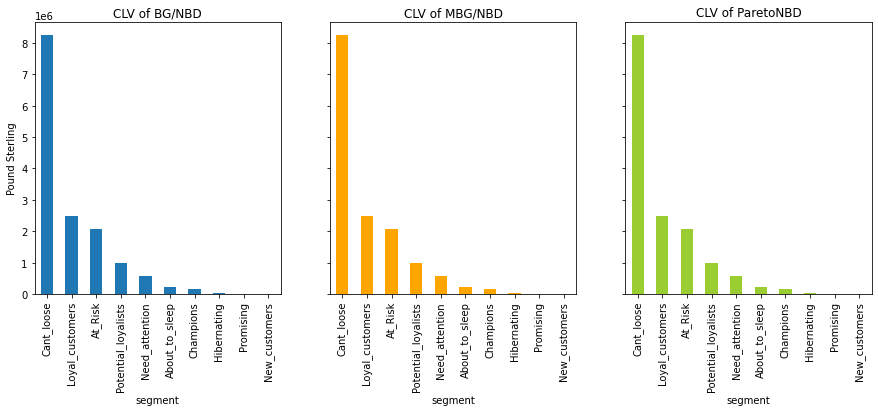

In [320]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,5),sharey=True)
df_bdnbd.groupby('segment')['predicted_clv'].sum().sort_values(ascending=False).plot(kind='bar',ax=ax1)
df_mbgnbd.groupby('segment')['predicted_clv'].sum().sort_values(ascending=False).plot(kind='bar',ax=ax2,color='orange')
df_pnbd.groupby('segment')['predicted_clv'].sum().sort_values(ascending=False).plot(kind='bar',ax=ax3,color='yellowgreen')
ax1.set_title('CLV of BG/NBD')
ax2.set_title('CLV of MBG/NBD')
ax3.set_title('CLV of ParetoNBD')
ax1.set_ylabel('Pound Sterling')